<h1 style="text-align: center;">WSI - przeszukiwanie </h1>

### 1. Rysowanie wykresów funkcji f i g:

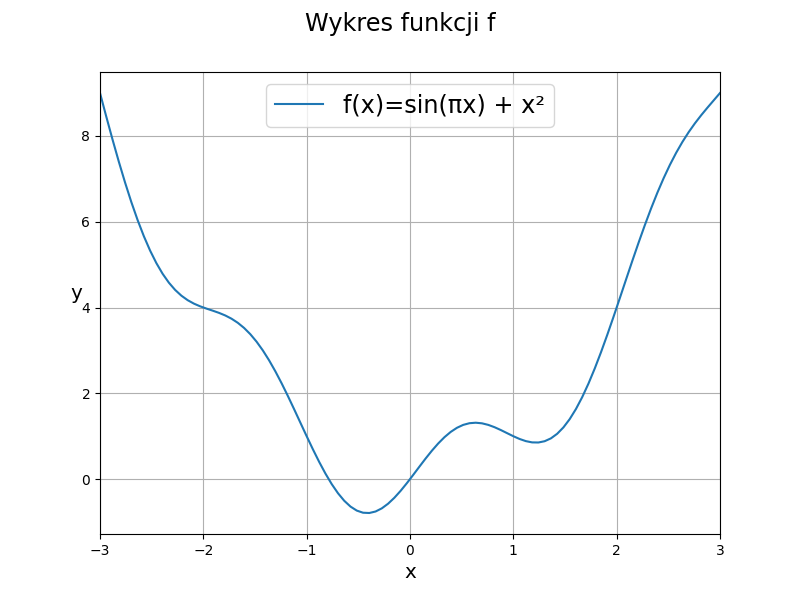

In [1]:
%matplotlib ipympl

from matplotlib import pyplot as plt
from plotting import plot_2d
import numpy as np
from solver import Function, Experiment

F_LINSPACE = np.linspace(-3, 3, 100)

f = Function(
    lambda x: np.sin(np.pi * x) + x**2, 
    lambda x: np.pi * np.cos(np.pi * x) + 2 * x,
    2, (-10, 10)
    )  

plot_2d(F_LINSPACE, f.f, "f(x)=sin(πx) + x²", "Wykres funkcji f")

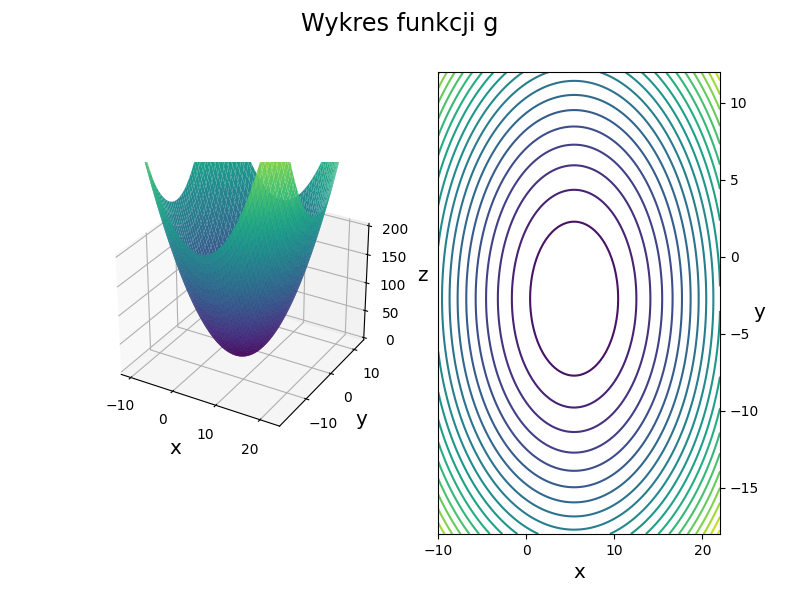

In [2]:
from plotting import plot_3d

G_LINSPACEX = np.linspace(-10, 22, 100)
G_LINSPACEY = np.linspace(-18, 12, 100)

g = Function(
    lambda x1, x2: 5*np.exp(2) - 4*np.exp(1)*x1 + x1**2 + 2*np.exp(1)*x2 + x2**2,
    lambda x1, x2: np.array([-4*np.exp(1) + 2*x1, 2*np.exp(1) + 2*x2]),
    3, ((0, 12), (-8, 2))
)

plot_3d(G_LINSPACEX, G_LINSPACEY, g.f, "Wykres funkcji g")

Łatwiejsza do optymalizacji będzie funkcja g, ponieważ posiada ona tylko jedno minimum lokalne będące równocześnie jej minimum globalnym. Funkcja f posiada dwa minima lokalne zatem znalezienie minimum globalnego będzie w dużej mierze zależało od wyboru punktu startowego. Optymalizując funkcję g, zakładając dobry wybór parametru kroku, zawsze znajdziemy jej minimum globalne.

### 2. Optymalizacja funkcji przy użyciu algorytmu najszybszego spadku:

Algorytm został zaimplementowany w pliku *gradien_descent.py*.


#### - Optymalizacja funcji f

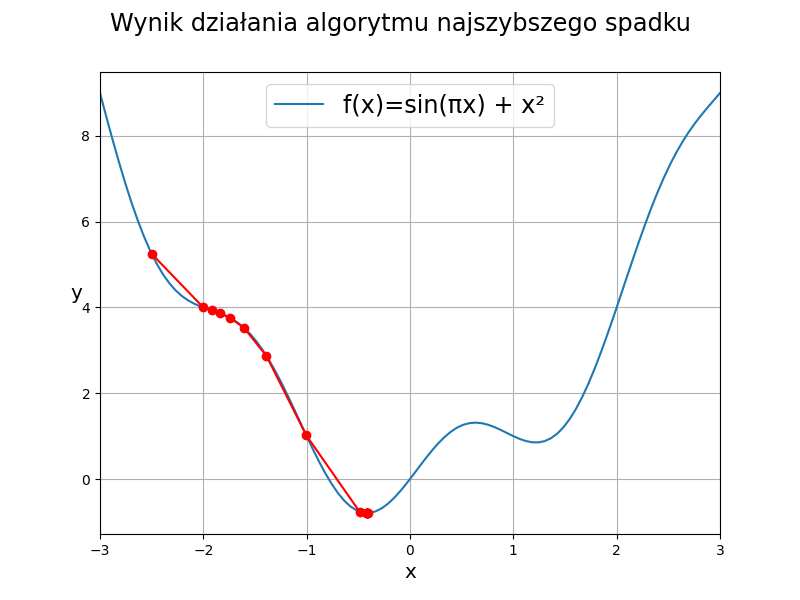

Minimum funkcji f: -0.7923324634710966, w punkcie x = -0.4149116190542472


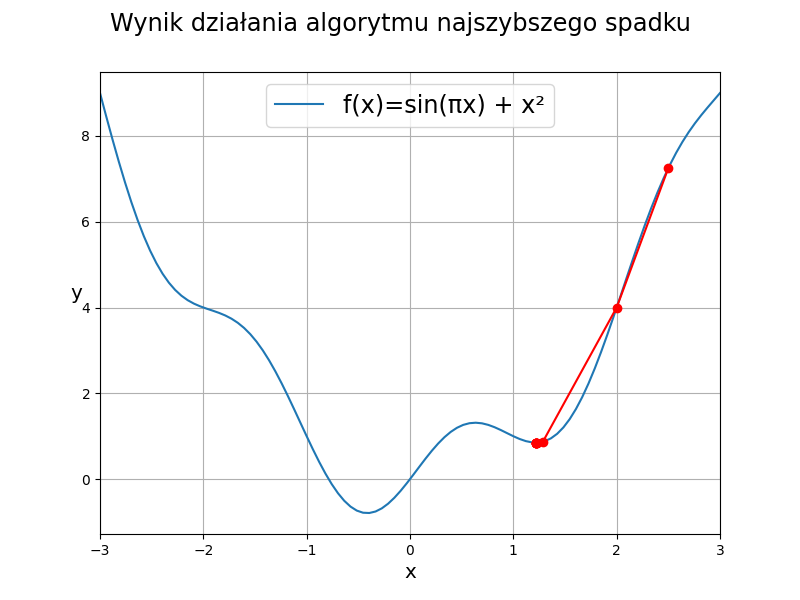

Minimum funkcji f: 0.8509533532099885, w punkcie x = 1.217656929166939


In [3]:
STARTING_POINT1 = np.array([-2.5])
STARTING_POINT2 = np.array([2.5])
LEARNING_RATE = 0.1
PRECISION = 1e-6
MAX_ITERATIONS = 1000

exp1 = Experiment(f, STARTING_POINT1, LEARNING_RATE, PRECISION, MAX_ITERATIONS)
result1 = exp1.conduct()

exp2 = Experiment(f, STARTING_POINT2, LEARNING_RATE, PRECISION, MAX_ITERATIONS)
result2 = exp2.conduct()

plot_2d(F_LINSPACE, f.f, "f(x)=sin(πx) + x²", "Wynik działania algorytmu najszybszego spadku", result1.path_to_min)
print(f"Minimum funkcji f: {f.f(*result1.minimum)}, w punkcie x = {result1.minimum[0]}")

plot_2d(F_LINSPACE, f.f, "f(x)=sin(πx) + x²", "Wynik działania algorytmu najszybszego spadku", result2.path_to_min)
print(f"Minimum funkcji f: {f.f(*result2.minimum)}, w punkcie x = {result2.minimum[0]}")


#### - Optymalizacja funkcji g

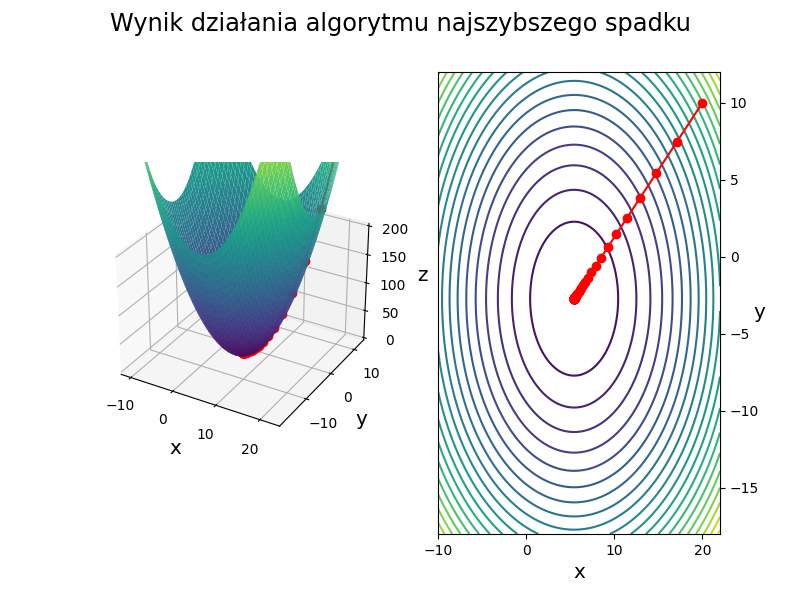

Minimum funkcji g: 1.8918200339612667e-13, w punkcie x = (5.43656397856015, -2.718281547568309)


In [4]:
STARTING_POINT = np.array([20, 10])
LEARNING_RATE = 0.1
PRECISION = 1e-6
MAX_ITERATIONS = 1000

exp3 = Experiment(g, STARTING_POINT, LEARNING_RATE, PRECISION, MAX_ITERATIONS)
result = exp3.conduct()

plot_3d(G_LINSPACEX, G_LINSPACEY, g.f, "Wynik działania algorytmu najszybszego spadku", result.path_to_min)
print(f"Minimum funkcji g: {g.f(*result.minimum)}, w punkcie x = ({result.minimum[0]}, {result.minimum[1]})")

### 3. Badanie wpływu rozmiaru kroku dla różnych punktów początkowych:

In [5]:
from solver import Solver
import pandas as pd

ITERATION_NUMBER = 1000
EXPERIMENTS_NUMBER = 1000
LEARNING_RATES = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]
EXPECTED_F_GLOBAL_MIN = -0.7923324634710966

s1 = Solver(ITERATION_NUMBER, f, LEARNING_RATES)
s1.generate_experiments(EXPERIMENTS_NUMBER)
s1.solve()
results = s1.get_results_data()

Wyniki przeprowadzonych eksperymentów dla funkcj f:

In [6]:
from generate_tab_data import generate_table

df = generate_table(results, f, EXPECTED_F_GLOBAL_MIN).reset_index(drop=True)
df

,parametr kroku,punkt początkowy,wynik działania algorytmu,czas trwania,liczba iteracji,czy znaleziono minimum globalne
0,0.001,[-6.341728822091071],[-1.7661319346196134],0.009257,1000,Nie
1,0.001,[-8.719374062645972],[-1.9153166895888611],0.010240,1000,Nie
2,0.001,[5.001066527774414],[1.226047704076278],0.012663,1000,Nie
3,0.001,[-6.663716069806949],[-1.7942314917642954],0.009597,1000,Nie
4,0.001,[-7.75452555289553],[-1.8609406993182183],0.009115,1000,Nie
...,...,...,...,...,...,...
995,1.000,[-3.1996299634801133],[2986.10810240318],0.011214,1000,Nie
996,1.000,[3.5014930883371846],[-2989.152555959459],0.010527,1000,Nie
997,1.000,[-4.791234425616997],[-2993.09846878972],0.009442,1000,Nie
998,1.000,[2.53471344261866],[2963.9311763156766],0.008852,1000,Nie


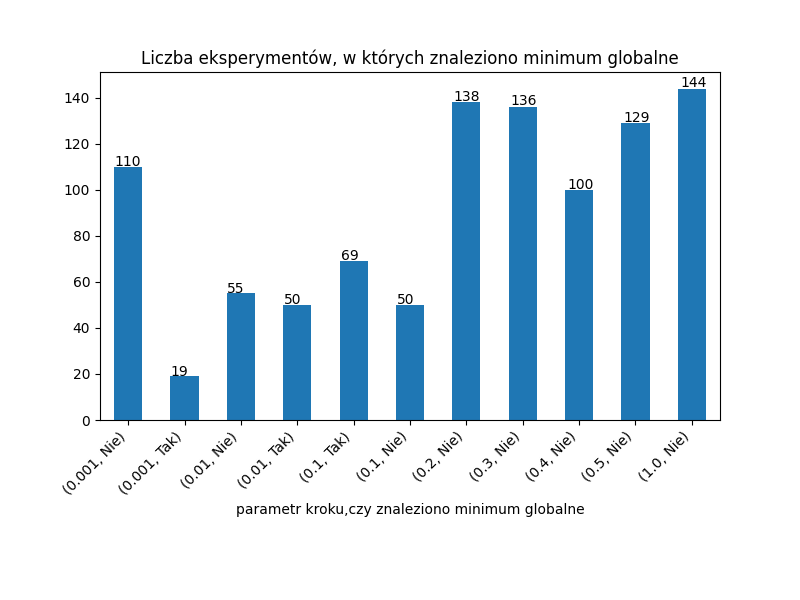

In [7]:
from generate_tab_data import plot_data

plot_data(df)